In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.linear_model as lm
from scipy import stats

### **1.Loading the Database**


In [8]:
import os
import json
import csv
from datetime import datetime, timedelta

# dataset
file_name = "task_manager_dataset.csv"

# load task from file

def load_tasks_from_file(file_name):
    if not os.path.exists(file_name):
        return []
    with open(file_name, 'r', newline='') as file:
        reader = csv.DictReader(file)
        return list(reader)



### **2.Dataset Into Data Frame**


In [9]:

# Load the data set.
tasks = load_tasks_from_file(file_name)
tasks_df = pd.DataFrame(tasks) # Convert the list of tasks to a pandas DataFrame

# Size?
shape = tasks_df.shape
print("Data frame shape", shape, "r,c")

# Print the first/last five lines.
tasks_df.head()

Data frame shape (59, 5) r,c


,Title,Description,Priority,Deadline,Status
0,Submit Assignment,Complete and submit the university assignment.,High,2025-01-20,Completed
1,Prepare Tax Filing,Prepare documents and fill out forms for tax f...,High,2025-01-20,Pending
2,Clean the House,Clean the living room and kitchen.,Low,2025-01-20,Completed
3,Set Up Meeting Room,Set up the meeting room for tomorrow's team se...,Low,2025-01-20,Completed
4,Write Daily Journal,Write a journal entry for the day.,Low,2025-01-20,Completed


In [14]:
tasks_df.tail()

,Title,Description,Priority,Deadline,Status
54,Buy New Phone,Research and purchase a new smartphone.,High,2025-02-05,Pending
55,Send Invitations,Send out invitations for the upcoming event.,Medium,2025-02-05,Pending
56,Complete Online Course,Complete the online Python programming course.,High,2025-02-10,In Progress
57,Buy New Laptop,Research and buy a new laptop.,Medium,2025-02-10,In Progress
58,Plan Vacation,Start planning the summer vacation including d...,Medium,2025-02-15,


In [15]:
print(tasks_df.describe())

                    Title                                     Description  \
count                  59                                              59   
unique                 59                                              59   
top     Submit Assignment  Complete and submit the university assignment.   
freq                    1                                               1   

       Priority    Deadline   Status  
count        59          59       59  
unique        3          15        4  
top        High  2025-01-22  Pending  
freq         25          13       25  


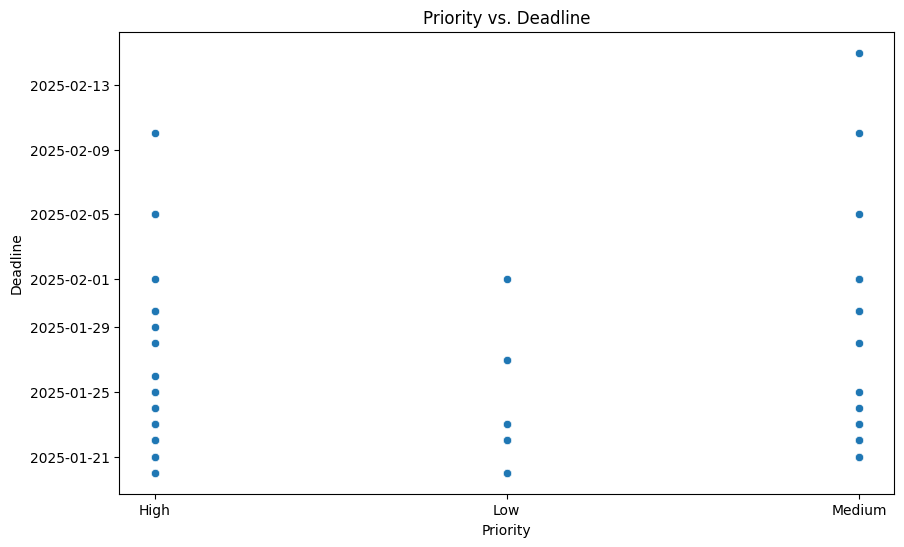

In [20]:

if not pd.api.types.is_datetime64_any_dtype(tasks_df['Deadline']):
    tasks_df['Deadline'] = pd.to_datetime(tasks_df['Deadline'])

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='Priority', y='Deadline', data=tasks_df)
plt.xlabel('Priority')
plt.ylabel('Deadline')
plt.title('Priority vs. Deadline')
plt.show()

In [ ]:

# save task to file

def save_tasks_to_file(tasks, file_name):
    with open(file_name, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Title", "Description", "Priority", "Deadline", "Status"])
        for task in tasks:
            writer.writerow([task["Title"], task["Description"], task["Priority"], task["Deadline"], task["Status"]])

# add new task

def add_task(tasks):
    title = input("Enter task title: ")
    description = input("Enter task description: ")
    priority = input("Enter priority (High, Medium, Low): ").capitalize()
    deadline = input("Enter deadline (YYYY-MM-DD) or leave blank: ")
    if deadline:
        try:
            deadline = datetime.strptime(deadline, "%Y-%m-%d").strftime("%Y-%m-%d")
        except ValueError:
            print("Invalid date format. Skipping deadline.")
            deadline = None
    else:
        deadline = None
    tasks.append({"Title": title, "Description": description, "Priority": priority, "Deadline": deadline, "Status": "Pending"})
    save_tasks_to_file(tasks, file_name)


#update task status
def update_task_status(tasks):
    title = input("Enter the title of the task to update: ")
    for task in tasks:
        if task["Title"].lower() == title.lower():
            new_status = input("Enter new status (Pending, In Progress, Completed): ").capitalize()
            if new_status in ["Pending", "In Progress", "Completed"]:
                task["Status"] = new_status
                print("Task status updated.")
                print(task)
            else:
                print("Invalid status.")
            save_tasks_to_file(tasks, file_name)
            return
    print("Task not found.")

# Display all Task
def display_Tasks(tasks):
    for task in tasks:
        print(task)

# Display reminders
def display_reminders(tasks):
    today = datetime.today().date()
    for task in tasks:
        if task["Deadline"]:
            deadline_date = datetime.strptime(task["Deadline"], "%Y-%m-%d").date()
            if deadline_date < today:
                print(f"Overdue: {task['Title']} (Deadline: {task['Deadline']})")
            elif deadline_date <= today + timedelta(days=1):
                print(f"Upcoming: {task['Title']} (Deadline: {task['Deadline']})")

# Genarate report
def generate_reports(tasks):
    total = len(tasks)
    completed = sum(1 for task in tasks if task["Status"] == "Completed")
    pending = sum(1 for task in tasks if task["Status"] == "Pending")
    grouped_by_priority = {
        "High": sum(1 for task in tasks if task["Priority"] == "High"),
        "Medium": sum(1 for task in tasks if task["Priority"] == "Medium"),
        "Low": sum(1 for task in tasks if task["Priority"] == "Low"),
    }
    print(f"Total tasks: {total}\nCompleted tasks: {completed}\nPending tasks: {pending}\nTasks by priority: {grouped_by_priority}")

# Sort task

def sort_tasks(tasks):
    criterion = input("Sort by (priority, deadline, status): ").lower()
    if criterion == "priority":
        tasks.sort(key=lambda x: ["High", "Medium", "Low"].index(x["Priority"]))
    elif criterion == "deadline":
        tasks.sort(key=lambda x: x["Deadline"] or "")
    elif criterion == "status":
        tasks.sort(key=lambda x: x["Status"])
    print("Tasks sorted.")
    for task in tasks:
        print(task)

# filter task
def filter_tasks(tasks):
    criterion = input("Filter by (High Priority, Pending Tasks): ").lower()
    if criterion == "high priority":
        filtered = [task for task in tasks if task["Priority"] == "High"]
    elif criterion == "pending tasks":
        filtered = [task for task in tasks if task["Status"] == "Pending"]
    else:
        print("Invalid filter.")
        return
    for task in filtered:
        print(task)


# main

def main():
    file_name = "task_manager_dataset.csv"
    tasks = load_tasks_from_file(file_name)


    while True:
        print("\nTask Manager Menu:")
        print("1. Add Task")
        print("2. Update Task Status")
        print("3. Sort Tasks")
        print("4. Filter Tasks")
        print("5. Display Reminders")
        print("6. Generate Reports")
        print("7. Show All Task")
        print("8. Exit")
        choice = input("Choose an option: ")

        if choice == "1":
            add_task(tasks)
        elif choice == "2":
            update_task_status(tasks)
        elif choice == "3":
            sort_tasks(tasks)
        elif choice == "4":
            filter_tasks(tasks)
        elif choice == "5":
            display_reminders(tasks)
        elif choice == "6":
            generate_reports(tasks)
        elif choice == "7":
            display_Tasks(tasks)
        elif choice == "8":
            save_tasks_to_file(tasks, file_name)
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")


if __name__ == "__main__":
    main()


Task Manager Menu:
1. Add Task
2. Update Task Status
3. Sort Tasks
4. Filter Tasks
5. Display Reminders
6. Generate Reports
7. Show All Task
8. Exit
